In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth, SpectralClustering, AffinityPropagation
%matplotlib inline

In [2]:
#3 blob set
centers_1 = [[1, 2], [-3, -4], [3, -2], [-3, 1]]
centers_2 = [[1, 2], [-3, -4], [3, -2], [-3, 1]]
centers_3 = [[1, 2], [-3, -4]]

#4 blobs with a stdev of 1
X1, y1 = make_blobs(
    n_samples=10000,
    centers=centers_1,
    cluster_std=1,
    n_features=2)

#4 blobs with a stdev of 2
X2, y2 = make_blobs(
    n_samples=10000,
    centers=centers_2,
    cluster_std=2,
    n_features=2)

#2 blobs with a stdev of 5
X3, y3 = make_blobs(
    n_samples=10000,
    centers=centers_3,
    cluster_std=5,
    n_features=2)

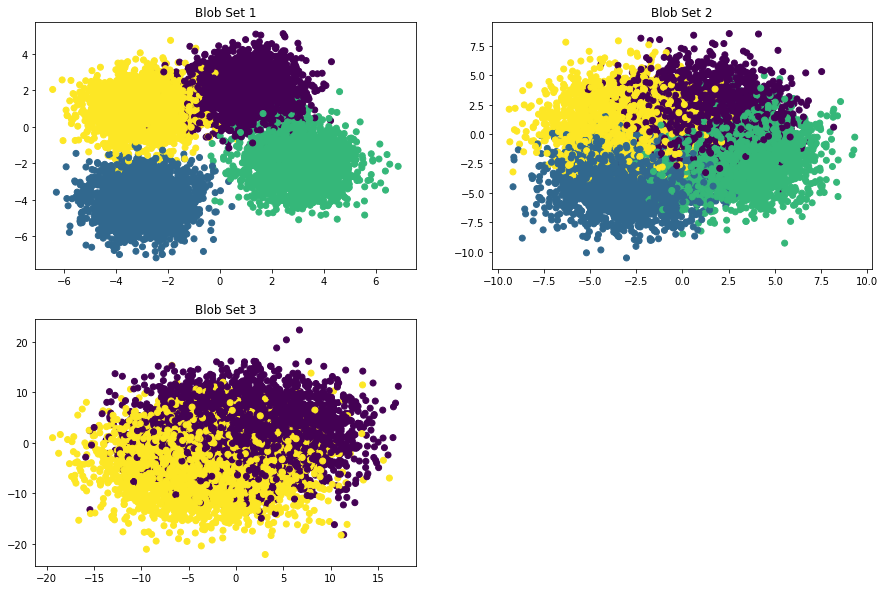

In [3]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1)
plt.title('Blob Set 1')

plt.subplot(2, 2, 2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2)
plt.title('Blob Set 2')

plt.subplot(2, 2, 3)
plt.scatter(X3[:, 0], X3[:, 1], c=y3)
plt.title('Blob Set 3')

plt.show()

In [4]:
#train test split our data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.9)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.9)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.9)

In [5]:
#write functions to estimate clusters in mean shift, spectral, and affinity propagation

def mean_shift(data, q, n):
    bandwidth = estimate_bandwidth(data, quantile=q, n_samples=n)
    
    # Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    
    # Extract cluster assignments for each data point.
    labels = ms.labels_
    
    # Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_
    
    # Count our clusters.
    n_clusters_ = len(np.unique(labels))
    
    print("Number of estimated clusters: {}".format(n_clusters_))
    
    plt.scatter(data[:, 0], data[:, 1], c=labels)
    plt.show()

Number of estimated clusters: 4


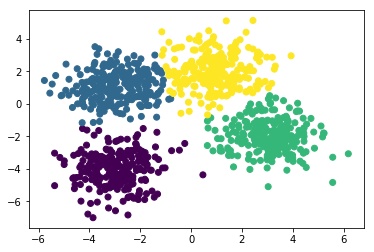

Number of estimated clusters: 4


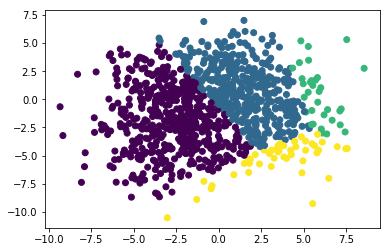

Number of estimated clusters: 5


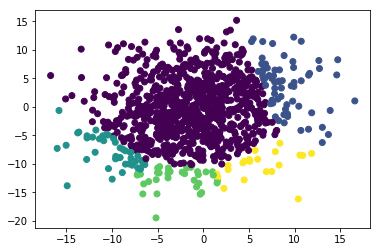

In [6]:
mean_shift(X1_train, 0.1, 500)
mean_shift(X2_train, 0.1, 500)
mean_shift(X3_train, 0.1, 500)

In [7]:
def spectral_cluster(data, clusters):
    # We know we're looking for a specific nubmer of clusters.
    n_clusters=clusters

    # Declare and fit the model.
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(data)

    #Predicted clusters.
    predict=sc.fit_predict(data)

    #Graph results.
    plt.scatter(data[:, 0], data[:, 1], c=predict)
    plt.show()

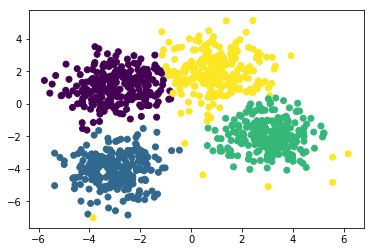

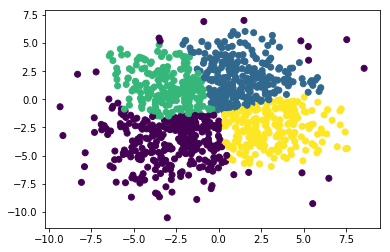

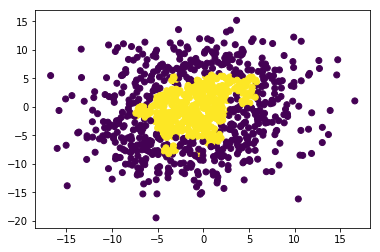

In [8]:
spectral_cluster(X1_train, 4)
spectral_cluster(X2_train, 4)
spectral_cluster(X3_train, 2)

In [9]:
def affinity_prop(data):
    af = AffinityPropagation().fit(data)
    
    # Pull the number of clusters and cluster assignments for each data point.
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = af.labels_

    print('Estimated number of clusters: {}'.format(n_clusters_))

In [10]:
affinity_prop(X1_train)
affinity_prop(X2_train)
affinity_prop(X3_train)

Estimated number of clusters: 19
Estimated number of clusters: 34
Estimated number of clusters: 36
